<h1><center>GRMDS Project - Responsible Investing</center><h1>

<center><img width=40% src="https://github.com/girishksahu/RMDS_Project_Responsible_Investing/blob/SMART_AI_Learning/image/responsible-investing.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summary**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Your client for this project is investor who is looking for investment in sustainablility based funds with good returns.

   
**<h3>Current Scenario:</h3>**

- Need to perform EDA and create a Tableau dashboard for Responsible Investing.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- The company has hired you as a data science consultant to provide a dashboard for Responsible Investing.

<a name = Section21></a>
### **Your Role**

- You are given a dataset of Funds and their sustainability rating.

- Your task is to build a classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: **Predict whether Fund is considered a Responsible Investing based on Sustainability Rating**

- Machine Learning Task: **Multi-Class Classification.**

- Target Variable: **Morningstar Sustainability Rating**
- Win Condition: **N/A (best possible model)**

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/RMDS_Project_Responsible_Investing/blob/SMART_AI_Learning/image/ESG-Overview.jpg?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [86]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [87]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **dataset** consists of all the necessary information about the Funds like Name, Ticker, Morningstar sustainability rating, Yield, Morningstar category, etc.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 6003 | 29 | 1.3+ MB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Name**   | Name of the Fund |
|02| **Ticker**      | An abbreviation of the fund's name|
|03| **Morningstar sustainability rating**        | The rating of the sustainability from the Morningstar|
|04| **Yield**          | The income return of a mutual fund|
|05| **Morningstar category**      | Fund category by location size and type |
|06| **Portfolio sustainability score**           | Financial sustainability score on this portfolio|
|07| **Portfolio environmental score**     | Environmental sustainability score on this portfolio|
|08| **Portfolio social score**        | Social sustainability score on this portfolio  |
|09| **Portfolio governance**          | Governance sustainability score on this portfolio      |
|10| **Sustainable investment by prospectus**         |Binary value claimed as sustainable investment or not  |
|11| **Sustainable investment - ESG Fund**     | Binary value claimed as ESG fund or not   |
|12| **Sustainable investment - Impact Fund**     | 	Binary value claimed as Impact fund or not     |
|13| **Sustainable investment - Environmental Sector Fund**     | Binary value claimed as Environmental sector fund or not     |
|14| **Animal testing**     | Binary value if the fund is related to animal testing           |
|15| **%Alcohol**     | Percentage of the fund related to alcohol            |
|16| **%Fossil Fuels**     | Percentage of the fund related to fossil fuels       |
|17| **%Small Arms**     | Percentage of the fund related to small arms                         |
|18| **%Thermal Coal**     | Percentage of the fund related to thermal coal  |
|19| **%Tobacco**     | Percentage of the fund related to tobacco            |
|20| **YTD Return(%)**     | The amount of profit (or loss) realized by an investment since the first trading day of the current calendar year           |
|21| **1 Year Annualized(%)**     | the geometric average amount of money earned by an investment each year over a given time period |
|22| **3 Year Annualized(%)**     | 3-year annualized total return  |
|23| **5 Year Annualized(%)**     | 5-year annualized total return  |
|24| **10 Year Annualized(%)**     |10-year annualized total return |
|25| **Fund Size (Mil)**     | dollars size of the fund  |
|26| **Equity StyleBox**     | stylebox defined by Morningstar  |
|27| **Fixed Income StyleBox**     | stylebox defined by Morningstar  |
|28| **Average Market Cap (Mil)**     | The geometric mean of the market capitalizations of the stocks a fund owns |
|29| **Average Credit Quality**     |Average credit quality gives a snapshot of the portfolio's overall credit quality. It is an average of each bond's credit rating, adjusted for its relative weighting in the portfolio |

<br>

- Load Funds train dataset to be used for Training and Validation

In [88]:
# Load Churn_train.csv
funds_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/RMDS_Project_Responsible_Investing/SMART_AI_Learning/dataset/funds.csv")

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', funds_df.shape)

# Output first 10 data rows
funds_df.head(10)


Shape of the Training and Validation dataset: (6003, 29)


,Name,Ticker,Morningstar Sustainability Rating,Yield (%),Morningstar Category,Portfolio Sustainability Score,Portfolio Environmental Score,Portfolio Social Score,Portfolio Governance Score,Sustainable Investment by Prospectus,Sustainable Investment - ESG Fund,Sustainable Investment - Impact Fund,Sustainable Investment - Environmental Sector Fund,Animal Testing,% Alcohol,% Fossil Fuels,% Small Arms,% Thermal Coal,% Tobacco,YTD Return (%),1 Year Annualized (%),3 Years Annualized (%),5 Years Annualized (%),10 Years Annualized (%),Fund Size (Mil),Equity StyleBox,Fixed Income StyleBox,Average Market Cap (Mil),Average Credit Quality
0,AB Sustainable Intl Thematic C,AWPCX,3.0,0.00,Global Equity Large Cap,20.67,4.21,8.13,6.92,Yes,Yes,Yes,No,0,0.0,3.73,0.0,1.90,0.0,8.22,24.74,19.32,12.27,7.50,941.47,Large Growth,NaN,"32,187.09",BBB
1,AB Sustainable Thematic Credit A,STHAX,5.0,NaN,US Fixed Income,21.27,3.39,8.11,6.78,Yes,Yes,Yes,No,0,0.0,8.24,0.0,2.25,0.0,8.22,24.74,19.32,12.27,7.50,174.22,NaN,NaN,"32,187.09",BBB
2,AB Sustainable Thematic Credit Advisor,STHYX,5.0,NaN,US Fixed Income,21.27,3.39,8.11,6.78,Yes,Yes,Yes,No,0,0.0,8.24,0.0,2.25,0.0,8.22,24.74,19.32,12.27,7.50,174.22,NaN,NaN,"32,187.09",BBB
3,Aberdeen International Sust Ldrs A,BJBIX,3.0,0.54,Global Equity Large Cap,20.99,3.31,8.61,6.60,Yes,Yes,No,No,0,0.0,2.33,0.0,2.34,0.0,11.74,34.20,16.19,11.93,6.09,146.06,Large Growth,NaN,"36,331.08",BBB
4,Aberdeen International Sust Ldrs I,JIEIX,3.0,0.83,Global Equity Large Cap,20.99,3.31,8.61,6.60,Yes,Yes,No,No,0,0.0,2.33,0.0,2.34,0.0,11.99,34.56,16.49,12.20,6.36,146.06,Large Growth,NaN,"36,331.08",BBB
5,Aberdeen US Sust Ldrs Smlr Coms A,MLSAX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,28.06,53.27,26.72,19.31,10.61,21.34,Mid Growth,NaN,"6,832.72",BBB
6,Aberdeen US Sust Ldrs Smlr Coms C,MLSCX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,26.89,51.76,25.77,18.41,9.82,21.34,Mid Growth,NaN,"6,832.72",BBB
7,Aberdeen US Sust Ldrs Smlr Coms Instl,GGUIX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,28.39,53.85,27.15,19.73,10.98,21.34,Mid Growth,NaN,"6,832.72",BBB
8,Aberdeen US Sust Ldrs Smlr Coms InstlSvc,AELSX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,28.21,53.56,26.96,19.54,10.76,21.34,Mid Growth,NaN,"6,832.72",BBB
9,Aberdeen US Sust Ldrs Smlr Coms R,GLSRX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,27.54,52.76,26.37,18.94,10.22,21.34,Mid Growth,NaN,"6,832.72",BBB


In [89]:
# Check for any missing values
any(funds_df.isna().sum())

True

In [90]:
#check if any duplicate row
any(funds_df.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [91]:
#Basic statistical details for numeric variables
funds_df.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
Morningstar Sustainability Rating,5993.0,3.506257,0.722056,1.00,3.000,3.00,4.000,5.00
Yield (%),5910.0,0.958667,1.266840,0.00,0.030,0.67,1.380,34.08
Portfolio Sustainability Score,5993.0,22.367559,2.868454,10.38,20.770,22.27,23.530,35.20
Portfolio Environmental Score,5993.0,3.731320,1.522058,0.00,2.980,3.75,4.210,14.04
Portfolio Social Score,5993.0,8.554747,2.264916,0.00,8.160,9.14,9.850,14.53
Portfolio Governance Score,5991.0,6.489062,1.584564,0.00,6.300,7.01,7.330,11.20
% Alcohol,6003.0,0.722409,1.436546,0.00,0.000,0.08,0.900,19.97
% Fossil Fuels,6003.0,5.893253,9.783290,0.00,1.155,4.82,7.010,100.69
% Small Arms,6003.0,0.612870,0.959304,0.00,0.000,0.17,0.870,7.91
% Thermal Coal,6003.0,1.059207,2.722055,0.00,0.000,0.45,1.305,63.91


In [92]:
#Basic statistical details for numeric variables
funds_df.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
Animal Testing,6003.0,0.01416,0.118158,0.0,0.0,0.0,0.0,1.0


**Observations:**
- Total count for all numeric variables is not same as 6003 which confirms that there are missing values.

In [93]:
#Basic statistical details for categorical variables
funds_df.describe(include=[np.object]).transpose()

,count,unique,top,freq
Name,6003,5677,Fidelity Advisor Freedom������������������,30
Ticker,6002,6002,AGWUX,1
Morningstar Category,6001,47,Global Equity Large Cap,730
Sustainable Investment by Prospectus,6003,2,No,5184
Sustainable Investment - ESG Fund,6003,2,No,5203
Sustainable Investment - Impact Fund,6003,2,No,5614
Sustainable Investment - Environmental Sector Fund,5997,2,No,5962
Fund Size (Mil),6003,1764,15539.16,21
Equity StyleBox,5405,9,Large Core,2294
Fixed Income StyleBox,1642,9,Medium Moderate,560


**Observations:**
- Total count for all categorical variables is not same as 6003 which confirms that there are missing values. 

In [94]:
funds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Name                                                6003 non-null   object 
 1   Ticker                                              6002 non-null   object 
 2   Morningstar Sustainability Rating                   5993 non-null   float64
 3   Yield (%)                                           5910 non-null   float64
 4   Morningstar Category                                6001 non-null   object 
 5   Portfolio Sustainability Score                      5993 non-null   float64
 6   Portfolio Environmental Score                       5993 non-null   float64
 7   Portfolio Social Score                              5993 non-null   float64
 8   Portfolio Governance Score                          5991 non-null   float64
 9

In [95]:
# Columns list can be handy and useful for further steps
funds_df.columns

Index(['Name', 'Ticker', 'Morningstar Sustainability Rating', 'Yield (%)',
       'Morningstar Category', 'Portfolio Sustainability Score',
       'Portfolio Environmental Score', 'Portfolio Social Score',
       'Portfolio Governance Score', 'Sustainable Investment by Prospectus',
       'Sustainable Investment - ESG Fund',
       'Sustainable Investment - Impact Fund',
       'Sustainable Investment - Environmental Sector Fund', 'Animal Testing',
       '% Alcohol', '% Fossil Fuels', '% Small Arms', '% Thermal Coal',
       '% Tobacco', 'YTD Return (%)', '1 Year Annualized (%)',
       '3 Years Annualized (%)', '5 Years Annualized (%)',
       '10 Years Annualized (%)', 'Fund Size (Mil)', 'Equity StyleBox',
       'Fixed Income StyleBox', 'Average Market Cap (Mil)',
       'Average Credit Quality'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [96]:
# Get list of categorical variables
s = (funds_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Name', 'Ticker', 'Morningstar Category', 'Sustainable Investment by Prospectus', 'Sustainable Investment - ESG Fund', 'Sustainable Investment - Impact Fund', 'Sustainable Investment - Environmental Sector Fund', 'Fund Size (Mil)', 'Equity StyleBox', 'Fixed Income StyleBox', 'Average Market Cap (Mil)', 'Average Credit Quality']


In [97]:
# Get list of numerical variables
s = (funds_df.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['Morningstar Sustainability Rating', 'Yield (%)', 'Portfolio Sustainability Score', 'Portfolio Environmental Score', 'Portfolio Social Score', 'Portfolio Governance Score', '% Alcohol', '% Fossil Fuels', '% Small Arms', '% Thermal Coal', '% Tobacco', 'YTD Return (%)', '1 Year Annualized (%)', '3 Years Annualized (%)', '5 Years Annualized (%)', '10 Years Annualized (%)']


In [98]:
# Get list of numerical variables
s = (funds_df.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
['Animal Testing']


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [99]:
profile = ProfileReport(df=funds_df)
profile.to_file(output_file='Responsible Investing Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- 

- For detailed information, please check **Responsible Investing Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are missing values and we need to pre process few features before EDA and Model Evaluation

In [100]:
funds_feature = funds_df.drop(columns=['Equity StyleBox','Fixed Income StyleBox'])

In [101]:
funds_feature.dropna(inplace=True)

In [102]:
funds_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859 entries, 0 to 6002
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Name                                                5859 non-null   object 
 1   Ticker                                              5859 non-null   object 
 2   Morningstar Sustainability Rating                   5859 non-null   float64
 3   Yield (%)                                           5859 non-null   float64
 4   Morningstar Category                                5859 non-null   object 
 5   Portfolio Sustainability Score                      5859 non-null   float64
 6   Portfolio Environmental Score                       5859 non-null   float64
 7   Portfolio Social Score                              5859 non-null   float64
 8   Portfolio Governance Score                          5859 non-null   float64
 9

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [103]:
# post_profile=ProfileReport(df=funds_df)
# post_profile.to_file(output_file='Responsible Investing Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the breakdown of Morningstar Sustainability Rating?**

In [104]:
funds_df['Morningstar Sustainability Rating'].value_counts()

3.0    3460
4.0    1746
5.0     696
2.0      78
1.0      13
Name: Morningstar Sustainability Rating, dtype: int64

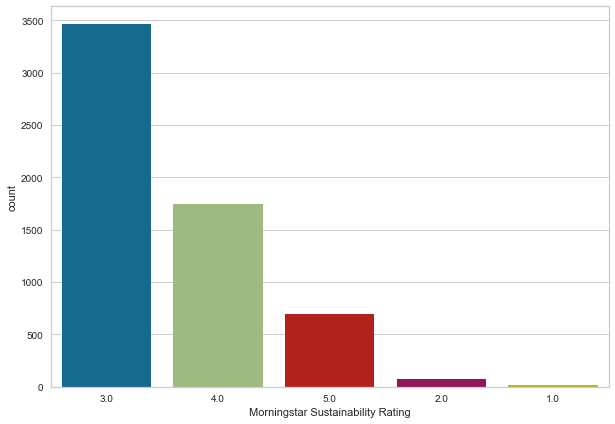

In [105]:
plt.figure(figsize=(10,7))
sns.countplot(x='Morningstar Sustainability Rating',data=funds_df,order=funds_df['Morningstar Sustainability Rating'].value_counts().index)
plt.show()

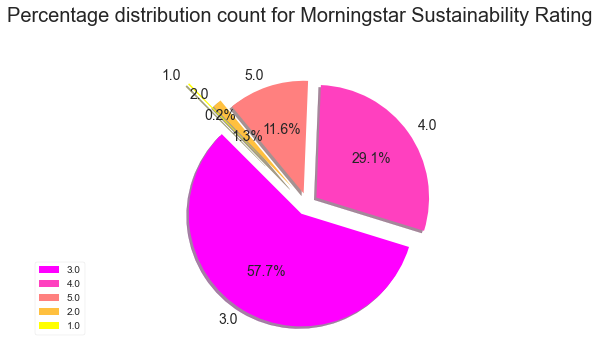

In [106]:
# plot percentage distribution count of Morningstar Sustainability Rating
funds_df['Morningstar Sustainability Rating'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.2,0.5], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,5), shadow=True, startangle=135, legend=False, cmap='spring')
plt.suptitle(t = 'Percentage distribution count for Morningstar Sustainability Rating', y = 1.05, size = 20)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = funds_df['Morningstar Sustainability Rating'].value_counts().index, loc ='lower left', frameon = True)
plt.show()

**Q: What is the breakdown of Morningstar Category?**

In [107]:
funds_df['Morningstar Category'].value_counts()

Global Equity Large Cap                    730
Target Date                                546
US Fixed Income                            492
US Equity Small Cap                        449
US Equity Mid Cap                          444
US Equity Large Cap Growth                 436
US Equity Large Cap Blend                  399
Moderate Allocation                        341
US Equity Large Cap Value                  317
Global Emerging Markets Equity             239
Aggressive Allocation                      236
Cautious Allocation                        180
Real Estate Sector Equity                  145
Global Equity Mid/Small Cap                130
Emerging Markets Fixed Income               82
Technology Sector Equity                    78
Long/Short Equity                           77
Flexible Allocation                         72
Global Fixed Income                         58
Healthcare Sector Equity                    49
Energy Sector Equity                        43
Infrastructur

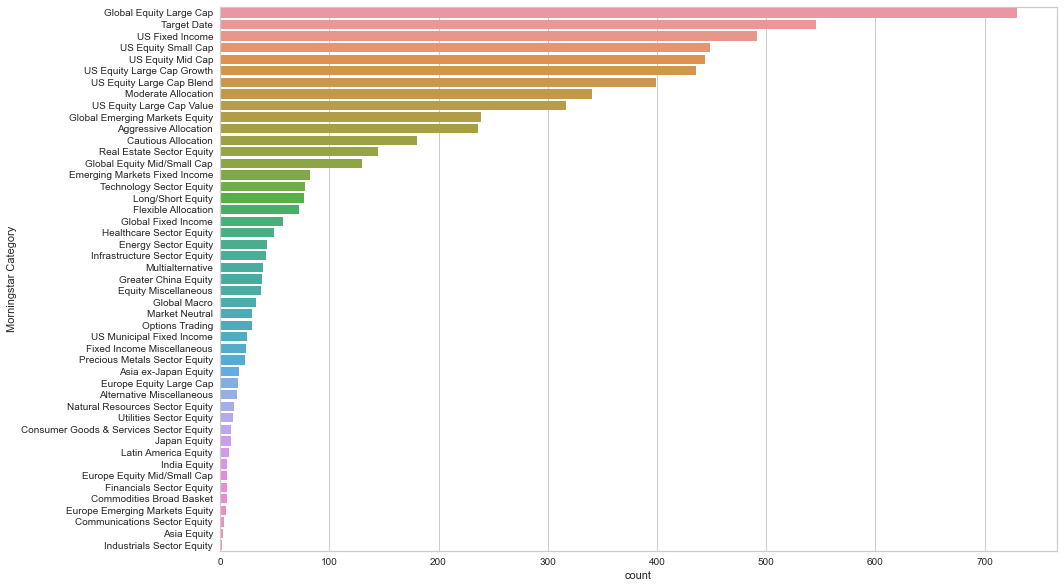

In [108]:
plt.figure(figsize=(15,10))
sns.countplot(y='Morningstar Category',data=funds_df,order=funds_df['Morningstar Category'].value_counts().index)
plt.show()

**Q: What is the breakdown of Sustainable Investment by Prospectus?**

In [109]:
funds_df['Sustainable Investment by Prospectus'].value_counts()

No     5184
Yes     819
Name: Sustainable Investment by Prospectus, dtype: int64

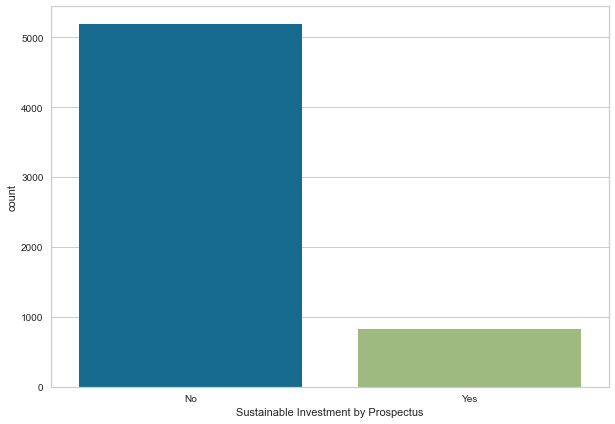

In [110]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sustainable Investment by Prospectus',data=funds_df,order=funds_df['Sustainable Investment by Prospectus'].value_counts().index)
plt.show()

**Q: What is the breakdown of Sustainable Investment - ESG Fund?**

In [111]:
funds_df['Sustainable Investment - ESG Fund'].value_counts()

No     5203
Yes     800
Name: Sustainable Investment - ESG Fund, dtype: int64

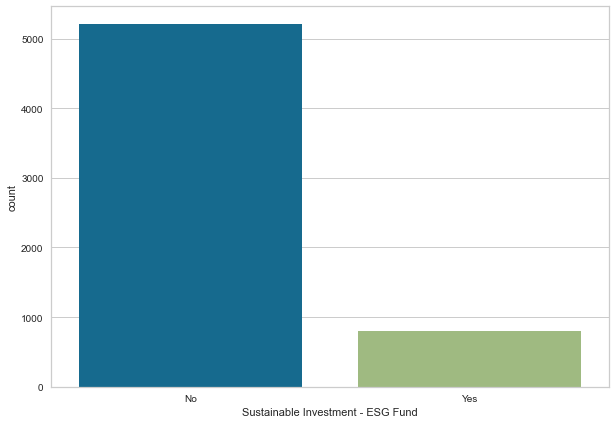

In [112]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sustainable Investment - ESG Fund',data=funds_df,order=funds_df['Sustainable Investment - ESG Fund'].value_counts().index)
plt.show()

**Q: What is the breakdown of Sustainable Investment - Impact Fund?**

In [113]:
funds_df['Sustainable Investment - Impact Fund'].value_counts()

No     5614
Yes     389
Name: Sustainable Investment - Impact Fund, dtype: int64

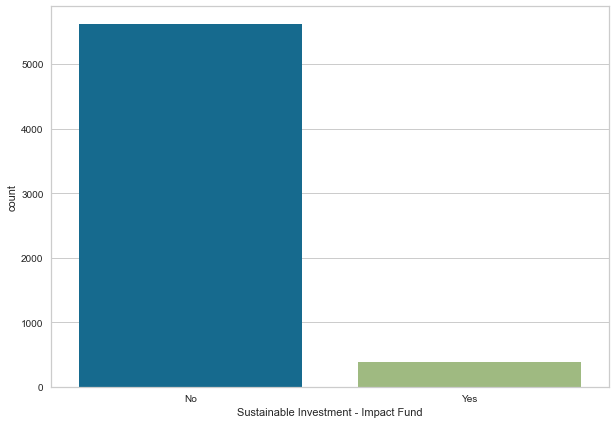

In [114]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sustainable Investment - Impact Fund',data=funds_df,order=funds_df['Sustainable Investment - Impact Fund'].value_counts().index)
plt.show()

**Q: What is the breakdown of Sustainable Investment - Environmental Sector Fund?**

In [115]:
funds_df['Sustainable Investment - Environmental Sector Fund'].value_counts()

No     5962
Yes      35
Name: Sustainable Investment - Environmental Sector Fund, dtype: int64

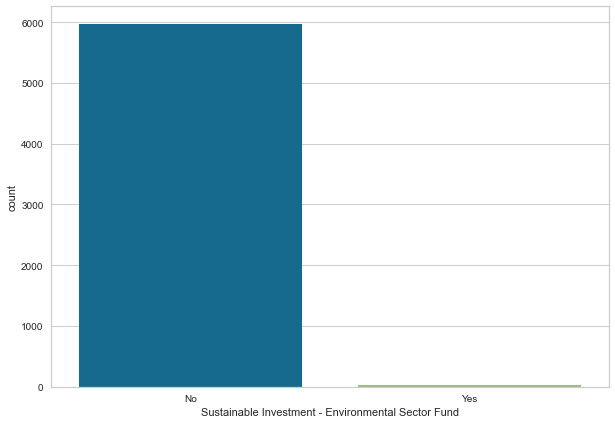

In [116]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sustainable Investment - Environmental Sector Fund',data=funds_df,order=funds_df['Sustainable Investment - Environmental Sector Fund'].value_counts().index)
plt.show()

**Q: What is the breakdown of Average Credit Quality?**

In [117]:
funds_df['Average Credit Quality'].value_counts()

BB     1723
BBB    1655
A      1434
AAA     504
AA      470
B       217
Name: Average Credit Quality, dtype: int64

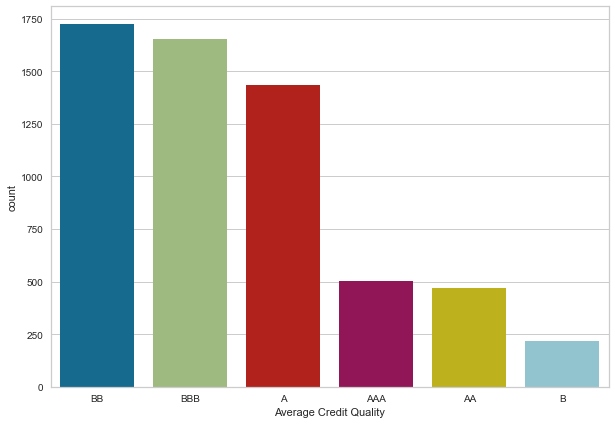

In [118]:
plt.figure(figsize=(10,7))
sns.countplot(x='Average Credit Quality',data=funds_df,order=funds_df['Average Credit Quality'].value_counts().index)
plt.show()

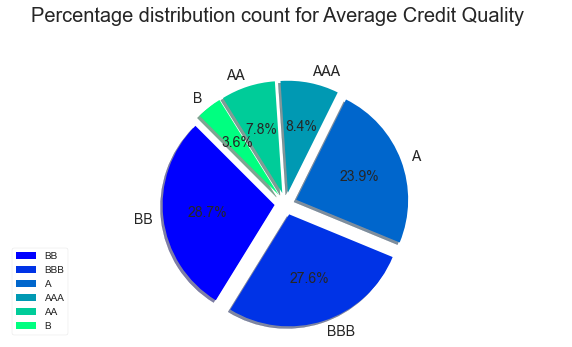

In [119]:
# plot percentage distribution count of Average Credit Quality
funds_df['Average Credit Quality'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1,0.1,0.1], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,5), shadow=True, startangle=135, legend=False, cmap='winter')
plt.suptitle(t = 'Percentage distribution count for Average Credit Quality', y = 1.05, size = 20)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = funds_df['Average Credit Quality'].value_counts().index, loc ='lower left', frameon = True)
plt.show()

**Q: What are the top Yield (%), YTD Return (%), 1 Year Annualized (%), 5 Years Annualized (%), 10 Years Annualized (%) groupby Morningstar Sustainability Rating?**

In [120]:
funds_df.groupby(by=['Morningstar Sustainability Rating'], as_index=False)['Yield (%)','YTD Return (%)','1 Year Annualized (%)','5 Years Annualized (%)','10 Years Annualized (%)'].median()

,Morningstar Sustainability Rating,Yield (%),YTD Return (%),1 Year Annualized (%),5 Years Annualized (%),10 Years Annualized (%)
0,1.0,0.00,22.310,52.760,15.900,10.220
1,2.0,1.11,0.615,6.375,13.805,9.740
2,3.0,0.89,12.950,27.220,12.200,11.025
3,4.0,0.41,13.765,25.210,12.910,11.720
4,5.0,0.26,15.055,29.125,15.580,12.660


**Q: What are the top Portfolio Sustainability Score, Portfolio Environmental Score, Portfolio Social Score, Portfolio Governance Score groupby Morningstar Sustainability Rating?**

In [121]:
funds_df.groupby(by=['Morningstar Sustainability Rating'], as_index=False)['Portfolio Sustainability Score','Portfolio Environmental Score','Portfolio Social Score','Portfolio Governance Score'].median()

,Morningstar Sustainability Rating,Portfolio Sustainability Score,Portfolio Environmental Score,Portfolio Social Score,Portfolio Governance Score
0,1.0,25.46,2.980,4.20,4.02
1,2.0,24.10,5.165,8.65,6.74
2,3.0,22.66,3.870,9.28,7.10
3,4.0,21.72,3.610,8.99,7.02
4,5.0,20.05,3.170,8.70,6.72


**Q: What are the top Animal Testing, % Alcohol, % Fossil Fuels, % Small Arms, % Thermal Coal, % Tobacco groupby Morningstar Sustainability Rating?**

In [122]:
funds_df.groupby(by=['Morningstar Sustainability Rating'], as_index=False)['Animal Testing','% Alcohol','% Fossil Fuels','% Small Arms','% Thermal Coal','% Tobacco'].median()

,Morningstar Sustainability Rating,Animal Testing,% Alcohol,% Fossil Fuels,% Small Arms,% Thermal Coal,% Tobacco
0,1.0,0,0.00,1.38,0.00,0.00,0.000
1,2.0,0,0.00,5.20,0.00,0.00,0.000
2,3.0,0,0.25,5.72,0.47,0.89,0.165
3,4.0,0,0.00,3.52,0.00,0.00,0.000
4,5.0,0,0.00,1.78,0.00,0.00,0.000


**Q: What are the top Yield (%), YTD Return (%), 1 Year Annualized (%), 5 Years Annualized (%), 10 Years Annualized (%) groupby Average Credit Quality?**

In [123]:
funds_df.groupby(by=['Average Credit Quality'], as_index=False)['Yield (%)','YTD Return (%)','1 Year Annualized (%)','5 Years Annualized (%)','10 Years Annualized (%)'].median()

,Average Credit Quality,Yield (%),YTD Return (%),1 Year Annualized (%),5 Years Annualized (%),10 Years Annualized (%)
0,A,0.580,11.90,21.860,13.135,11.725
1,AA,0.735,13.04,22.075,12.735,10.750
2,AAA,0.555,15.65,31.115,12.405,11.555
3,B,0.615,11.72,23.400,12.370,9.940
4,BB,0.760,14.31,29.920,12.670,11.240
5,BBB,0.660,13.67,27.380,12.640,11.640


**Q: What are the top Portfolio Sustainability Score, Portfolio Environmental Score, Portfolio Social Score, Portfolio Governance Score groupby Average Credit Quality?**

In [124]:
funds_df.groupby(by=['Average Credit Quality'], as_index=False)['Portfolio Sustainability Score','Portfolio Environmental Score','Portfolio Social Score','Portfolio Governance Score'].median()

,Average Credit Quality,Portfolio Sustainability Score,Portfolio Environmental Score,Portfolio Social Score,Portfolio Governance Score
0,A,22.410,3.720,9.290,7.05
1,AA,22.070,3.815,9.335,7.08
2,AAA,21.535,3.495,8.920,6.87
3,B,21.870,3.690,8.830,7.04
4,BB,22.310,3.850,9.100,6.96
5,BBB,22.300,3.720,9.120,7.02


**Q: What are the top Animal Testing, % Alcohol, % Fossil Fuels, % Small Arms, % Thermal Coal, % Tobacco groupby Average Credit Quality?**

In [125]:
funds_df.groupby(by=['Average Credit Quality'], as_index=False)['Animal Testing','% Alcohol','% Fossil Fuels','% Small Arms','% Thermal Coal','% Tobacco'].median()

,Average Credit Quality,Animal Testing,% Alcohol,% Fossil Fuels,% Small Arms,% Thermal Coal,% Tobacco
0,A,0,0.12,4.615,0.230,0.330,0.00
1,AA,0,0.00,4.980,0.315,0.145,0.00
2,AAA,0,0.00,2.430,0.000,0.000,0.00
3,B,0,0.00,3.660,0.000,0.000,0.00
4,BB,0,0.36,5.600,0.390,0.920,0.05
5,BBB,0,0.04,4.710,0.070,0.720,0.00


In [126]:
funds_df.groupby(by=['Morningstar Sustainability Rating','Average Credit Quality'], as_index=False)['Yield (%)','YTD Return (%)','1 Year Annualized (%)','5 Years Annualized (%)','10 Years Annualized (%)'].agg('median').sort_values(by ='Yield (%)', ascending = False)

,Morningstar Sustainability Rating,Average Credit Quality,Yield (%),YTD Return (%),1 Year Annualized (%),5 Years Annualized (%),10 Years Annualized (%)
7,2.0,BB,2.890,1.970,6.840,14.410,12.170
8,2.0,BBB,2.560,0.240,2.510,3.330,3.910
2,1.0,BB,2.350,14.795,35.855,11.545,12.340
4,2.0,A,1.225,8.715,27.455,15.030,12.725
1,1.0,AA,1.190,22.310,61.880,15.900,9.740
22,5.0,AA,1.080,10.700,16.850,15.900,10.280
24,5.0,B,1.070,14.670,36.930,12.370,4.550
13,3.0,BB,0.990,14.180,29.310,11.860,10.510
5,2.0,AA,0.970,1.380,20.455,15.900,9.740
14,3.0,BBB,0.870,12.895,28.610,12.130,11.525


In [127]:
funds_df.groupby(by=['Morningstar Category'], as_index=False)['Morningstar Sustainability Rating','Yield (%)','YTD Return (%)','Animal Testing','% Alcohol','% Fossil Fuels','% Small Arms','% Thermal Coal','% Tobacco'].agg('median').sort_values(by ='% Fossil Fuels', ascending = True)

,Morningstar Category,Morningstar Sustainability Rating,Yield (%),YTD Return (%),Animal Testing,% Alcohol,% Fossil Fuels,% Small Arms,% Thermal Coal,% Tobacco
23,Healthcare Sector Equity,3.0,0.000,9.000,0,0.000,0.000,0.000,0.000,0.000
36,Real Estate Sector Equity,3.0,1.420,29.480,0,0.000,0.000,0.000,0.000,0.000
38,Technology Sector Equity,4.0,0.000,20.975,0,0.000,0.000,0.000,0.000,0.000
14,Financials Sector Equity,3.0,0.985,31.100,0,0.000,0.000,0.000,0.000,0.000
13,Europe Equity Mid/Small Cap,3.0,0.000,16.620,0,0.000,0.000,0.000,0.000,0.000
5,Commodities Broad Basket,3.0,0.000,31.970,0,0.000,0.000,0.000,0.000,0.000
6,Communications Sector Equity,3.0,0.000,16.115,0,0.000,0.000,0.000,0.000,0.000
7,Consumer Goods & Services Sector Equity,3.0,0.000,17.545,0,0.570,0.000,0.000,0.000,0.000
40,US Equity Large Cap Growth,3.5,0.000,22.480,0,0.000,0.060,0.000,0.000,0.000
22,Greater China Equity,4.0,0.235,-8.730,0,2.600,0.070,0.000,0.000,0.000


**Q: What is the pair plot for Returns with respect to Morningstar Sustainability Rating?**

<Figure size 3600x1800 with 0 Axes>

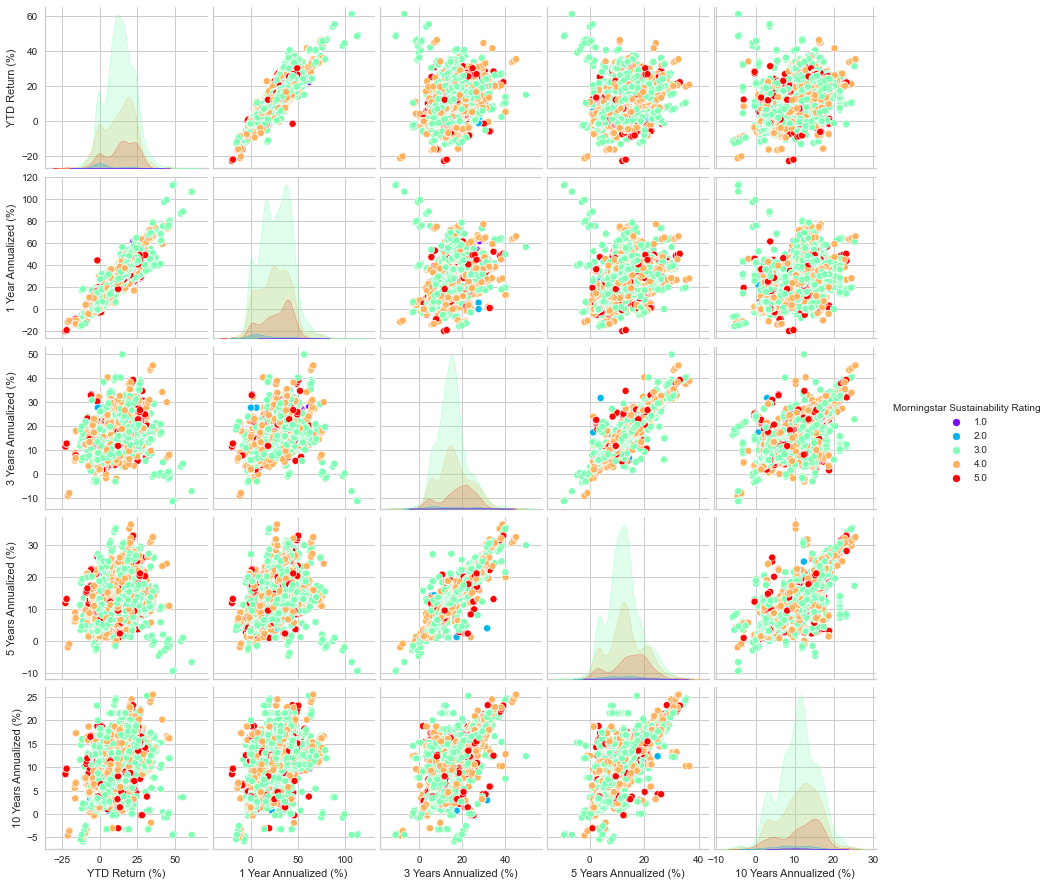

In [128]:
plt.figure(figsize=(50,25))
sns.pairplot(funds_df[['Morningstar Sustainability Rating','YTD Return (%)','1 Year Annualized (%)','3 Years Annualized (%)','5 Years Annualized (%)','10 Years Annualized (%)']],palette='rainbow',diag_kind='kde',hue='Morningstar Sustainability Rating')
plt.show()

**Q: What is the pair plot for Returns with respect to Average Credit Quality?**

<Figure size 3600x1800 with 0 Axes>

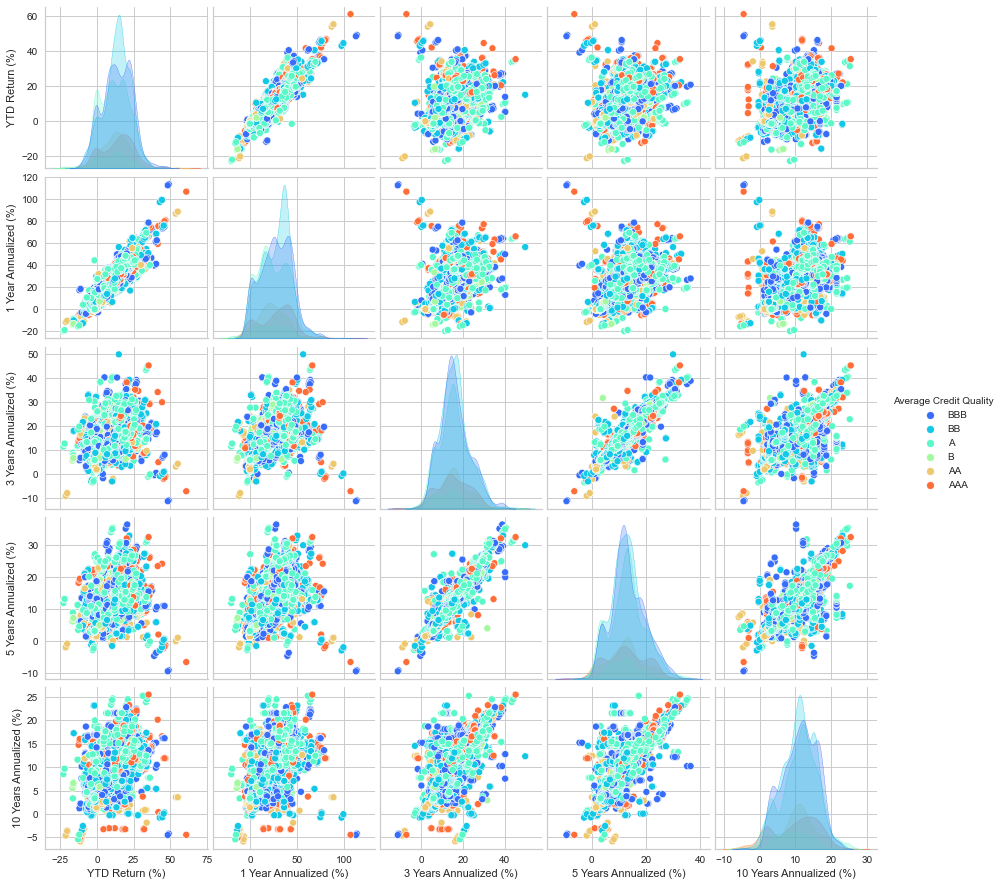

In [129]:
plt.figure(figsize=(50,25))
sns.pairplot(funds_df[['Average Credit Quality','YTD Return (%)','1 Year Annualized (%)','3 Years Annualized (%)','5 Years Annualized (%)','10 Years Annualized (%)']],palette='rainbow',diag_kind='kde',hue='Average Credit Quality')
plt.show()

Text(0.5, 1.0, 'Correlation between Numerical features')

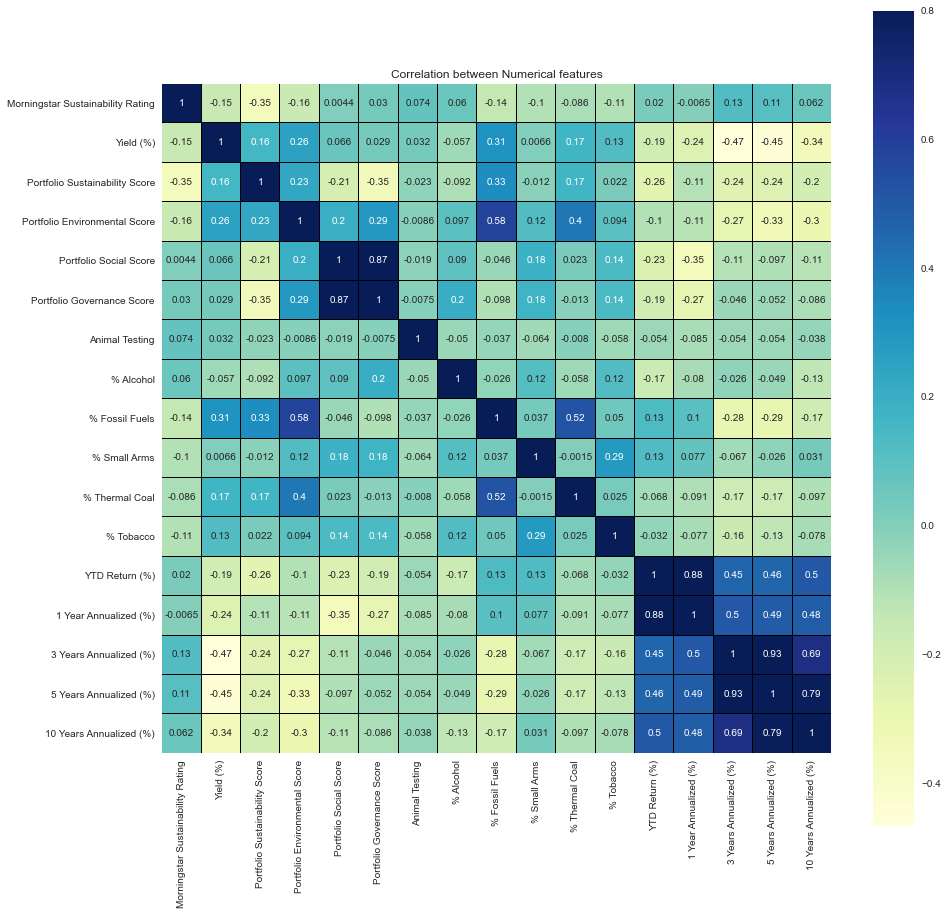

In [130]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = funds_df.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')

In [131]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
funds_df.cov()

,Morningstar Sustainability Rating,Yield (%),Portfolio Sustainability Score,Portfolio Environmental Score,Portfolio Social Score,Portfolio Governance Score,Animal Testing,% Alcohol,% Fossil Fuels,% Small Arms,% Thermal Coal,% Tobacco,YTD Return (%),1 Year Annualized (%),3 Years Annualized (%),5 Years Annualized (%),10 Years Annualized (%)
Morningstar Sustainability Rating,0.521364,-0.138460,-0.721992,-0.180109,0.007207,0.033859,0.006336,0.062705,-1.022976,-0.069769,-0.169757,-0.069701,0.147625,-0.078688,0.663398,0.515447,0.222065
Yield (%),-0.138460,1.604884,0.561183,0.496335,0.188596,0.057870,0.004890,-0.100732,3.913343,0.008002,0.582237,0.146531,-2.361987,-5.020502,-4.276672,-3.627143,-2.161317
Portfolio Sustainability Score,-0.721992,0.561183,8.228028,1.024629,-1.335878,-1.571282,-0.007687,-0.379045,9.333992,-0.034057,1.331492,0.057835,-7.468521,-5.217406,-5.118567,-4.387341,-2.842766
Portfolio Environmental Score,-0.180109,0.496335,1.024629,2.316662,0.690108,0.711051,-0.001546,0.212390,8.670527,0.181416,1.655689,0.130929,-1.570265,-2.906354,-3.000850,-3.244703,-2.273969
Portfolio Social Score,0.007207,0.188596,-1.335878,0.690108,5.129845,3.109342,-0.005209,0.291566,-1.025952,0.399568,0.140252,0.290762,-5.298835,-13.365171,-1.769487,-1.393977,-1.256330
Portfolio Governance Score,0.033859,0.057870,-1.571282,0.711051,3.109342,2.510843,-0.001407,0.460617,-1.525104,0.267459,-0.054528,0.203587,-3.040183,-7.319268,-0.532143,-0.522697,-0.678519
Animal Testing,0.006336,0.004890,-0.007687,-0.001546,-0.005209,-0.001407,0.013961,-0.008416,-0.043155,-0.007307,-0.002583,-0.006300,-0.063513,-0.169421,-0.046778,-0.041027,-0.022243
% Alcohol,0.062705,-0.100732,-0.379045,0.212390,0.291566,0.460617,-0.008416,2.063665,-0.370887,0.158752,-0.226588,0.162726,-2.412425,-1.935862,-0.274100,-0.453059,-0.953838
% Fossil Fuels,-1.022976,3.913343,9.333992,8.670527,-1.025952,-1.525104,-0.043155,-0.370887,95.712762,0.345622,13.861994,0.450135,13.118724,16.954371,-20.277423,-18.003499,-8.512369
% Small Arms,-0.069769,0.008002,-0.034057,0.181416,0.399568,0.267459,-0.007307,0.158752,0.345622,0.920264,-0.003978,0.251268,1.243521,1.238643,-0.467338,-0.156379,0.149746


<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

**Observations:**

- 

We will try to see which feature are more important using RandomForestClassifier

In [132]:
y = funds_feature['Morningstar Sustainability Rating']

In [133]:
y.isna().sum()

0

In [134]:
y.shape

(5859,)

In [135]:
feature_select= funds_feature[['Yield (%)', 'Portfolio Sustainability Score', 'Portfolio Environmental Score', 'Portfolio Social Score', 'Portfolio Governance Score', '% Alcohol', '% Fossil Fuels', '% Small Arms', '% Thermal Coal', '% Tobacco', 'YTD Return (%)', '1 Year Annualized (%)', '3 Years Annualized (%)', '5 Years Annualized (%)', '10 Years Annualized (%)']]

In [136]:
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier   

# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(feature_select, y)

# Extracting list of important features
selected_feat = feature_select.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 5
Threshold set by Model: 0.07
Features: ['Portfolio Sustainability Score', 'Portfolio Environmental Score', 'Portfolio Social Score', 'Portfolio Governance Score', '% Fossil Fuels']


**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

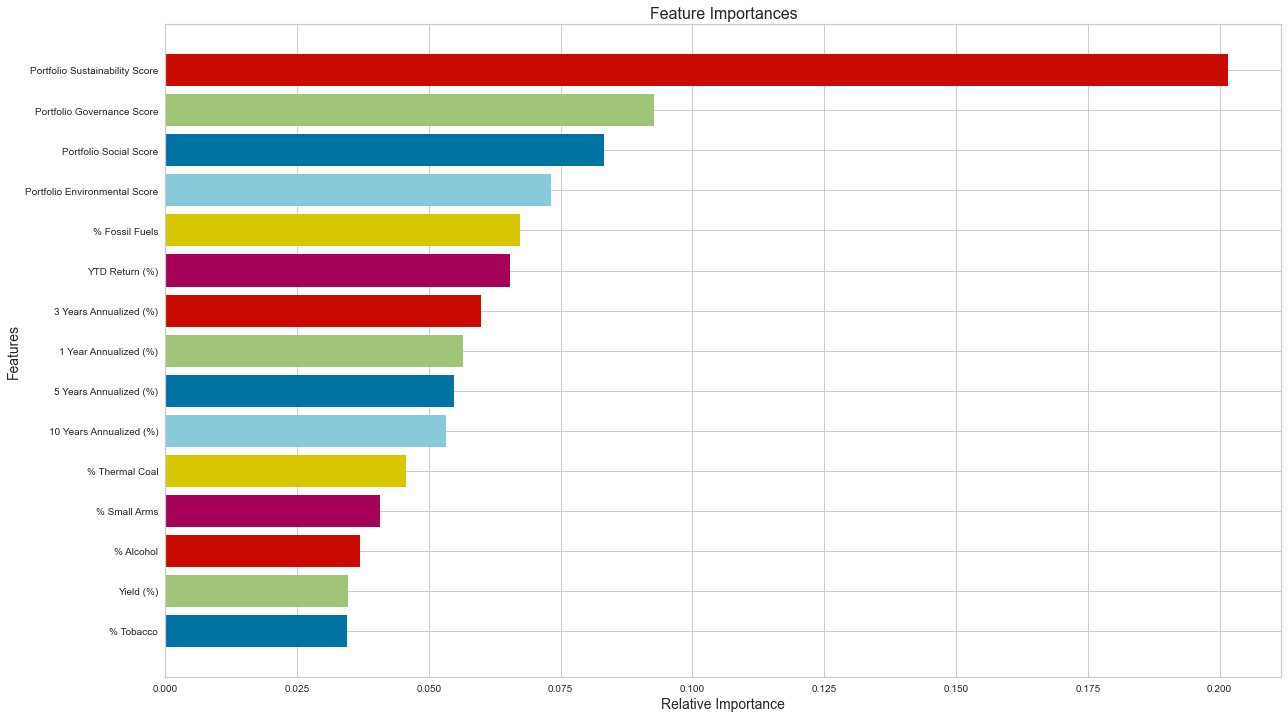

In [137]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(feature_select, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [138]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(feature_select, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (4394, 15)
y_train shape:  (4394,)
X_test shape:  (1465, 15)
y_test shape:  (1465,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4394 entries, 5921 to 4102
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Yield (%)                       4394 non-null   float64
 1   Portfolio Sustainability Score  4394 non-null   float64
 2   Portfolio Environmental Score   4394 non-null   float64
 3   Portfolio Social Score          4394 non-null   float64
 4   Portfolio Governance Score      4394 non-null   float64
 5   % Alcohol                       4394 non-null   float64
 6   % Fossil Fuels                  4394 non-null   float64
 7   % Small Arms                    4394 non-null   float64
 8   % Thermal Coal                  4394 non-null   float64
 9   % Tobacco                       4394 non-null   float64
 10  YTD Return (%)                  4394 non-null   float

,Yield (%),Portfolio Sustainability Score,Portfolio Environmental Score,Portfolio Social Score,Portfolio Governance Score,% Alcohol,% Fossil Fuels,% Small Arms,% Thermal Coal,% Tobacco,YTD Return (%),1 Year Annualized (%),3 Years Annualized (%),5 Years Annualized (%),10 Years Annualized (%)
5921,1.38,22.85,3.89,8.83,6.83,0.95,8.03,0.87,1.19,0.65,16.81,35.92,15.68,13.99,21.55
1313,1.00,24.66,3.83,11.10,7.05,0.00,3.55,0.23,1.51,0.77,-0.57,-0.29,4.27,2.76,2.05
5823,2.10,24.99,3.43,11.82,7.28,0.60,6.92,0.69,0.82,0.62,-1.90,0.39,6.42,3.89,3.97
448,0.00,19.50,3.75,8.90,6.63,1.35,3.29,1.23,1.99,0.00,22.33,38.77,25.47,22.29,16.99
211,1.04,21.20,4.63,8.75,7.67,0.19,7.80,0.45,0.43,0.51,8.63,27.27,13.37,1.32,0.72


<a name = Section73></a>
### **7.3 Data Scaling**

- Trying to evaluate model without any scaling of data.

In [139]:
# #Scaling the X part of data
# from sklearn.preprocessing import StandardScaler
# #from sklearn.preprocessing import RobustScaler
# scalar=StandardScaler() # defining object
# #scalar = RobustScaler()
# scalar.fit(X_train) #defining the scal
# X_train=scalar.transform(X_train)#actual scaling
# X_test=scalar.transform(X_test)

In [140]:
#X_train

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

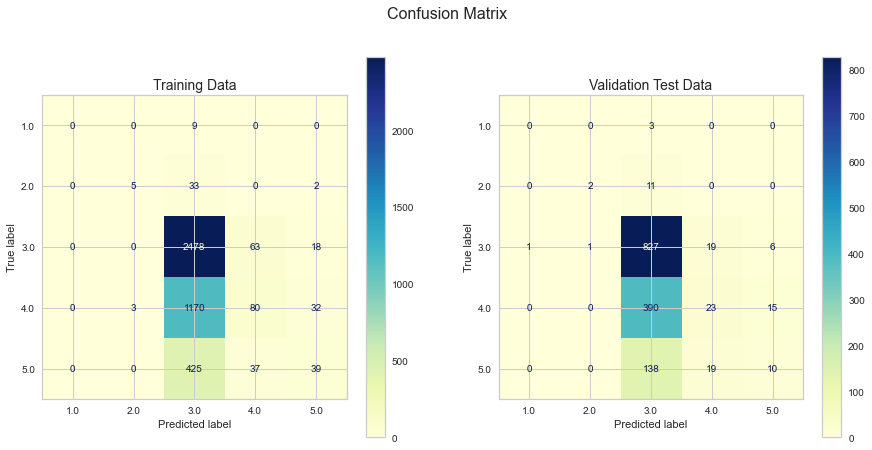

In [141]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [142]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred_count))
confusion_matrix.index = ['Actual 1.0','Actual 2.0','Actual 3.0','Actual 4.0','Actual 5.0']
confusion_matrix.columns = ['Predicted 1.0','Predicted 2.0','Predicted 3.0','Predicted 4.0','Predicted 5.0']
print(confusion_matrix)

            Predicted 1.0  Predicted 2.0  Predicted 3.0  Predicted 4.0  \
Actual 1.0              0              0              3              0   
Actual 2.0              0              2             11              0   
Actual 3.0              1              1            827             19   
Actual 4.0              0              0            390             23   
Actual 5.0              0              0            138             19   

            Predicted 5.0  
Actual 1.0              0  
Actual 2.0              0  
Actual 3.0              6  
Actual 4.0             15  
Actual 5.0             10  


In [143]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test validation data is: 0.5883959044368601


In [144]:
# K Fold
kf = KFold(shuffle=True, n_splits=5)
cv_results_kfold = cross_val_score(logreg,X_train, y_train, cv=kf, scoring='accuracy')
print(cv_results_kfold)

# Stratified K fold

skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='accuracy')
print(cv_results_skfold)

[0.62229807 0.55745165 0.592719   0.59385666 0.58428246]
[0.58134243 0.58248009 0.59726962 0.59158134 0.59453303]


In [145]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

                    Training Data Report          
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         9
         2.0       0.62      0.12      0.21        40
         3.0       0.60      0.97      0.74      2559
         4.0       0.44      0.06      0.11      1285
         5.0       0.43      0.08      0.13       501

    accuracy                           0.59      4394
   macro avg       0.42      0.25      0.24      4394
weighted avg       0.54      0.59      0.48      4394

                    Test Validation Data Report           
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.67      0.15      0.25        13
         3.0       0.60      0.97      0.74       854
         4.0       0.38      0.05      0.09       428
         5.0       0.32      0.06      0.10       167

    accuracy                           0.59      1465
   macro avg       0.

In [146]:
 #roc_disp= plot_roc_curve(logreg, X_test, y_test)

In [147]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# y_test_pred = logreg.predict(funds_test_df)
# y_test_pred
# #print (y_test_pred.shape)
# #print (y_test_pred)

In [148]:
# output = pd.DataFrame({'Ticker': funds_test_df.Ticker,'Morningstar Sustainability Rating': y_test_pred})
# output.to_csv('responsible-investing-submission.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summary**
---

<a name = Section91></a>
### **9.1 Conclusion**

- **Portfolio Sustainability Score** has the highest feature importance with respect to **Morningstar Sustainability Rating** followed by **Portfolio Governance Score, Portfolio Social Score** and **Portofolio Environmental Score**
- **Portfolio Governance Score** and **Portfolio Social Score** are highly correlated
- Higher rating for **Morningstar Sustainability Rating** (11.6% has Rating as 5.0, 29.1% has Rating as 4.0 and 57.7% has Rating as 3) for a Fund category does not necessarily translates to High Yield or Returns.
- Financials Sector Equity, Real Estate Sector Equity, Commodities Broad Basket, Technology Sector Equity etc. seems to have reasonable return with majority of them having Morningstar Sustainability Rating of 3.0 and Zero % share in Animal Testing, Alcohol, Fossil Fuels, Small Arms, Termal Coal, Tobacco etc.